In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as distance
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()
data.shape

(272, 2)

### Initialize your cluster centers

In [3]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    num_samples = data.shape[0]
    num_features = data.shape[1]

    ind = np.random.permutation(num_samples)[:k]
    centers = data[ind]
    return centers

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [4]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    return distance.cdist(data, mu)

In [5]:
x = np.array([[1,2], [4,5], [6,7]])
y = np.array([[2,5], [2,3]])

print(x)
print(y)

a = x @ y.T

print(x.sum(axis=0))

[[1 2]
 [4 5]
 [6 7]]
[[2 5]
 [2 3]]
[11 14]


#### Update k-means parameters

In [6]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    k = mu_old.shape[0]
    n_samples = mu_old.shape[1]

    dist_matrix = build_distance_matrix(data, mu_old)
    assignement = dist_matrix.argmin(axis=1)

    mu = np.zeros((k, n_samples))
    loss = np.zeros(n_samples)
    for k_ in range(k):
        ind = np.where(assignement == k_)[0]
        n = ind.size
        mu[k_] = data[ind].sum(axis=0) / n
    

    for n_ in range(n_samples):
        loss[n_] = np.linalg.norm(data[n_] - mu[assignement[n_]]) **2

    return loss, assignement, mu



#### Play with k-means

In [7]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu
    

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

The current iteration of k-means is: 0,                the average loss is 1.603105323273594.
The current iteration of k-means is: 1,                the average loss is 1.3935814673650981.
The current iteration of k-means is: 2,                the average loss is 1.3935814673650981.


## Using k-means for image compresson

#### load image

In [8]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=float32.


#### preprocess image

In [18]:
def preprocess_image(original_image):
    """preprocess the image."""
    processed_image = original_image.reshape(-1, 3) 
    return processed_image

processed_image = preprocess_image(original_image)

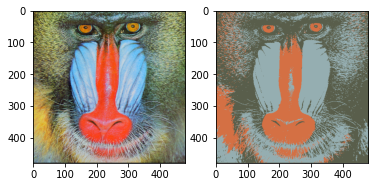

<Figure size 432x288 with 0 Axes>

In [34]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""

    mu_old = initialize_clusters(processed_image, k)
    loss_list = []
    # start the kmeans algorithm.
    for iter in range(max_iters):
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        # print("The current iteration of k-means is: {i}, \
        #        the average loss is {l}.".format(i=iter, l=average_loss))
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        mu_old = mu

    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 3
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)